In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
dt = pd.DataFrame({'X1':[2.7810836,1.4654893,3.3965616,1.3880701,3.0640723,7.6275312,5.3324412,6.9225967,8.6754186,7.6737564],
             'X2':[2.55053700,2.36212507,4.40029352,1.85022031,3.00530597,2.75926223,2.08862677,1.77106367,-0.2420686,3.50856301],
             'Y':[0,0,0,0,0,1,1,1,1,1]})
    

In [24]:
dt.sort_values(by=['X1','X2'],inplace=True)
dt.reset_index(drop=True,inplace=True)

In [25]:
dt

,X1,X2,Y
0,1.388070,1.850220,0
1,1.465489,2.362125,0
2,2.781084,2.550537,0
3,3.064072,3.005306,0
4,3.396562,4.400294,0
5,5.332441,2.088627,1
6,6.922597,1.771064,1
7,7.627531,2.759262,1
8,7.673756,3.508563,1
9,8.675419,-0.242069,1


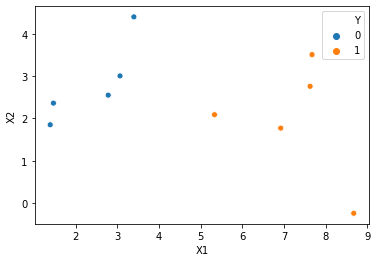

In [26]:
sns.scatterplot('X1','X2',hue='Y',data=dt)

In [27]:
model = LogisticRegression()

In [28]:
model.fit(dt[['X1']],dt['Y'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
model.coef_

array([[1.22553096]])

In [30]:
model.intercept_

array([-5.72049426])

In [31]:
values = model.intercept_+(model.coef_[0][0]*dt['X1'])#+(model.coef_[0][1]*dt['X2'])

In [32]:
values

0   -4.019371
1   -3.924492
2   -2.312190
3   -1.965379
4   -1.557903
5    0.814577
6    2.763362
7    3.627281
8    3.683932
9    4.911500
Name: X1, dtype: float64

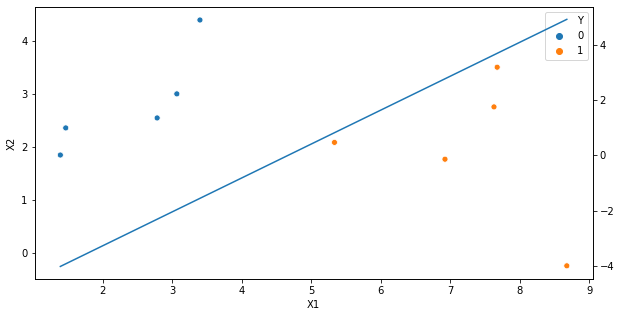

In [33]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot('X1','X2',hue='Y',data=dt)
ax2 = ax.twinx()
plt.plot(dt['X1'],values)

In [57]:
import math
(1/(1+(math.e**-(score))))

0.5863022968465423

In [50]:
(math.e**(-10.6513+0.0055*1000))#/1+math.e**(-10.6513+0.0055*1000)

0.00579187039907138

In [56]:
score = -10.6513+ 0.0055*2000

-5.151300000000001

In [35]:
sigmoid_value = []
for i in values:
    sigmoid_value.append((1/(1+(math.e**-(i)))))


In [36]:
dt

,X1,X2,Y
0,1.388070,1.850220,0
1,1.465489,2.362125,0
2,2.781084,2.550537,0
3,3.064072,3.005306,0
4,3.396562,4.400294,0
5,5.332441,2.088627,1
6,6.922597,1.771064,1
7,7.627531,2.759262,1
8,7.673756,3.508563,1
9,8.675419,-0.242069,1


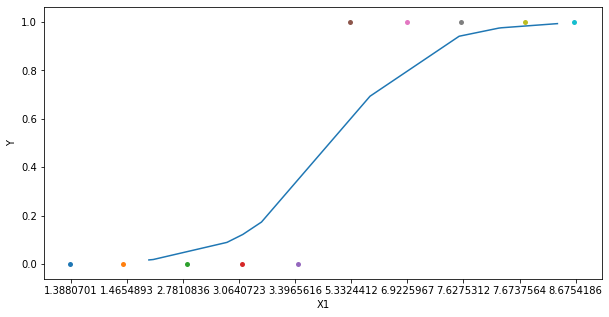

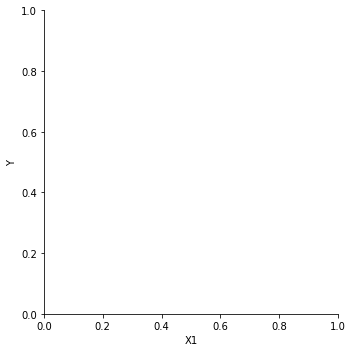

In [37]:
fig, ax = plt.subplots(figsize=(10,5))
sns.catplot(x='X1',y='Y',data=dt,ax=ax)
ax.plot(dt[['X1']],sigmoid_value)

In [21]:
model.predict(dt[['X1']])

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
dt['Y']

0    0
1    1
2    1
3    0
4    1
5    1
6    1
7    1
8    1
9    1
Name: Y, dtype: int64

In [38]:
dt = pd.DataFrame({'Hours':[0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50 ]
             ,'Exam':[0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1]})

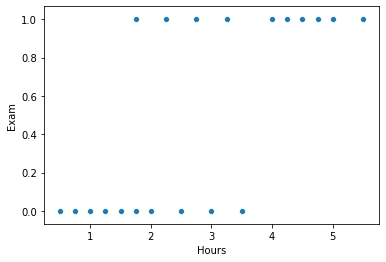

In [6]:
sns.scatterplot(x='Hours',y='Exam',data=dt)

In [7]:
logistic_model = LogisticRegression()

In [9]:
logistic_model.fit(dt[['Hours']],dt[['Exam']])

/home/sehan/Documents/Jupyter-notebook/my_jupyter_notebook_env/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
print('intercept: ',logistic_model.intercept_, 'Coefficient: ',logistic_model.coef_)

intercept:  [-3.13952411] Coefficient:  [[1.14860386]]


In [29]:
score = logistic_model.intercept_ + dt['Hours']*logistic_model.coef_[0][0]

In [30]:
import math

In [33]:
probs = 1/(1+math.e**-(score))

In [34]:
probs

0     0.071410
1     0.092955
2     0.120160
3     0.153974
4     0.195192
5     0.244259
6     0.244259
7     0.301047
8     0.364667
9     0.433395
10    0.504784
11    0.575979
12    0.644154
13    0.706944
14    0.810750
15    0.850946
16    0.883828
17    0.910222
18    0.931086
19    0.959990
Name: Hours, dtype: float64

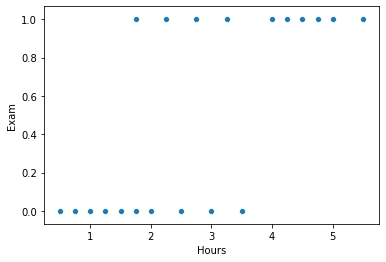

In [20]:
sns.scatterplot(x='Hours',y='Exam',data=dt)

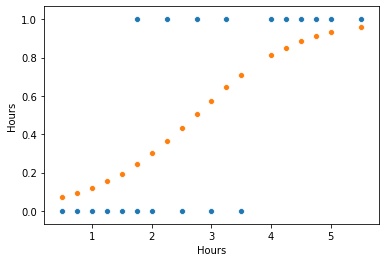

In [59]:
sns.scatterplot(x=dt['Hours'],y=dt['Exam'])
sns.scatterplot(x=dt['Hours'],y=probs)

In [36]:
probs

0     0.071410
1     0.092955
2     0.120160
3     0.153974
4     0.195192
5     0.244259
6     0.244259
7     0.301047
8     0.364667
9     0.433395
10    0.504784
11    0.575979
12    0.644154
13    0.706944
14    0.810750
15    0.850946
16    0.883828
17    0.910222
18    0.931086
19    0.959990
Name: Hours, dtype: float64

In [40]:
dt['Predicted'] = logistic_model.predict(dt[['Hours']])

In [54]:
dt['Mismatch'] = dt[['Exam','Predicted']].apply(lambda x: 'Matched' if x.Exam==x.Predicted else 'Unmatched',axis=1)

In [48]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [44]:
accuracy_score(dt['Exam'], dt['Predicted'])*100

80.0

In [52]:
precision_score(dt['Exam'], dt['Predicted'])*100

80.0

In [51]:
recall_score(dt['Exam'], dt['Predicted'])*100

80.0

In [57]:
dt['Mismatch'].value_counts()/len(dt)*100

Matched      80.0
Unmatched    20.0
Name: Mismatch, dtype: float64

In [61]:
logistic_model.predict_proba(dt[['Hours']])

array([[0.92858952, 0.07141048],
       [0.90704455, 0.09295545],
       [0.87984046, 0.12015954],
       [0.84602638, 0.15397362],
       [0.80480773, 0.19519227],
       [0.75574059, 0.24425941],
       [0.75574059, 0.24425941],
       [0.69895285, 0.30104715],
       [0.63533317, 0.36466683],
       [0.56660539, 0.43339461],
       [0.49521602, 0.50478398],
       [0.42402118, 0.57597882],
       [0.3558463 , 0.6441537 ],
       [0.29305565, 0.70694435],
       [0.18924992, 0.81075008],
       [0.14905371, 0.85094629],
       [0.11617173, 0.88382827],
       [0.08977835, 0.91022165],
       [0.06891381, 0.93108619],
       [0.04000986, 0.95999014]])

In [62]:
dt

,Hours,Exam,Predicted,Mismatch
0,0.50,0,0,Matched
1,0.75,0,0,Matched
2,1.00,0,0,Matched
3,1.25,0,0,Matched
4,1.50,0,0,Matched
5,1.75,0,0,Matched
6,1.75,1,0,Unmatched
7,2.00,0,0,Matched
8,2.25,1,0,Unmatched
9,2.50,0,0,Matched
